# [UCI SECOM Dataset](https://www.kaggle.com/paresh2047/uci-semcom)

[Semiconductor manufacturing process dataset](http://archive.ics.uci.edu/ml/datasets/SECOM)

2018/7/17 Wayne Nixalo

---

## 0. Setup

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [285]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
PATH = Path('data/datasets/paresh2047/uci-semcom')

In [4]:
df = pd.read_csv(PATH/'uci-secom.csv')

## 1. EDA

In [5]:
df.head() # -1 pass; +1 fail

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [21]:
df.values.shape

(1567, 592)

In [22]:
col = df.columns[-1]
col

'Pass/Fail'

In [23]:
passes = df.loc[df[col]==-1]
fails  = df.loc[df[col]== 1]

In [24]:
plt.style.use('seaborn')

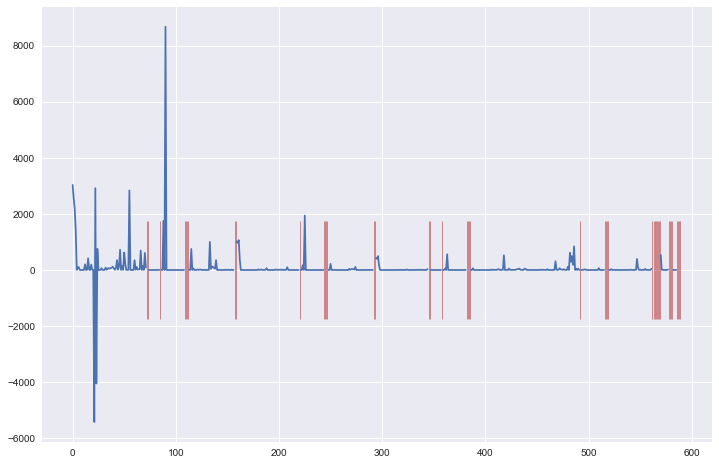

In [25]:
def plot_row(df, rows=0, show_nans=False, figsize=None, alpha=1.):
    if figsize is not None:
        fig = plt.figure(figsize=(figsize))
    if type(rows) == int:
        rows = [rows]
    for row in rows:
        row = df.values[row][1:]
        if show_nans:
            nans = np.where(pd.isnull(row))
            ymax,ymin = max(row)/5, -max(row)/5
            plt.vlines(nans, ymin=ymin, ymax=ymax, linewidth=.5, color='firebrick')
        plt.plot(range(len(row)), row, alpha=alpha);
    
plot_row(df, figsize=(12,8), show_nans=True)

### 50 random signals:

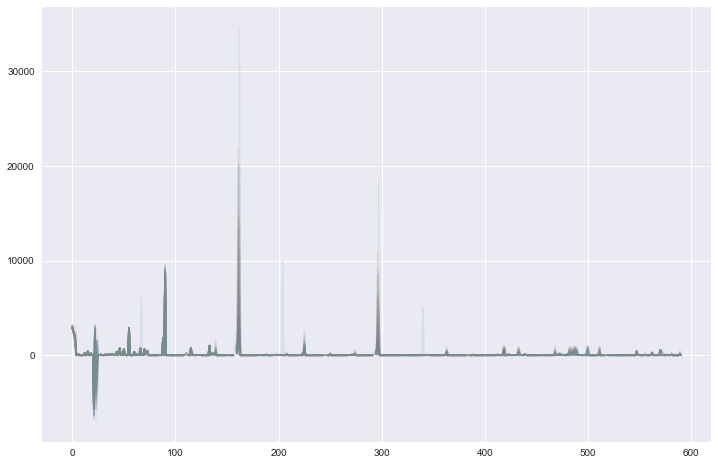

In [173]:
plot_row(df, np.random.randint(len(df), size=50), figsize=(12,8), alpha=0.1)

### All failures (104)

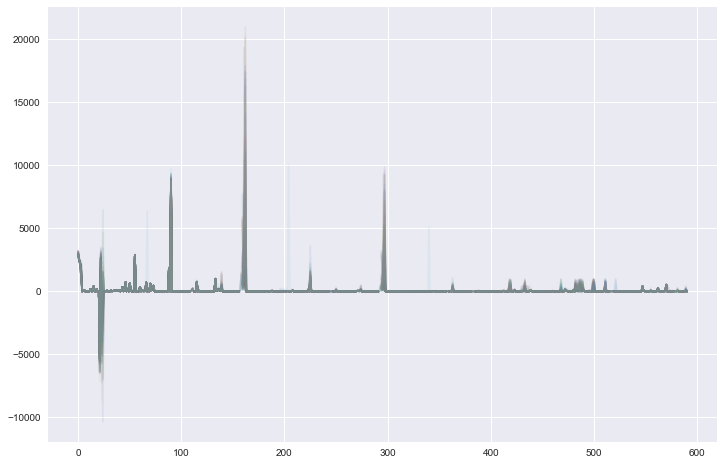

In [26]:
plot_row(fails, rows=range(len(fails)), figsize=(12,8), alpha=0.1)

### Random 100 passes

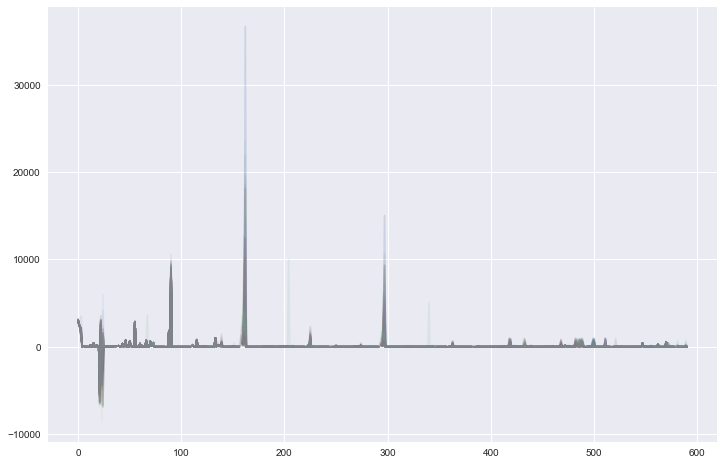

In [30]:
plot_row(passes, rows=np.random.randint(len(passes), size=100), figsize=(12,8), alpha=0.1)

Eyeing it isn't going to work.

## 2. Data split

train / val : 80 / 20

In [44]:
def train_val_idxs(data, p=0.2):
    idxs = np.random.permutation(len(data))
    n_val = int(len(data)*p)
    return idxs[n_val:], idxs[:n_val]

In [160]:
train_idxs, val_idxs = train_val_idxs(df)

In [197]:
train.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [537]:
train = df.iloc[train_idxs]
valid = df.iloc[val_idxs]

# remove the first 'timestamp' column
train = train.drop(columns=['Time'])
valid = valid.drop(columns=['Time'])

In [538]:
len(train), len(valid)

(1254, 313)

Since there are only 104 negative examples to 1463 positives, I want to ensure there's a similar ratio in the split datasets.

In [539]:
pos, neg =  len(passes), len(fails)
pos, neg, neg/pos

(1463, 104, 0.0710868079289132)

In [540]:
pos, neg = len(valid.loc[valid[col]==-1]), len(valid.loc[valid[col]== 1])
pos, neg, neg/pos

(291, 22, 0.07560137457044673)

In [541]:
pos, neg = len(train.loc[train[col]==-1]), len(train.loc[train[col]== 1])
pos, neg, neg/pos

(1172, 82, 0.06996587030716724)

I could try resampling negative examples to artificially balance the dataset, although I won't attempt to generatively create new examples here.

## 2.1 Data preprocessing

In [542]:
# replacing NaNs with the mean of each row
for rdx in range(len(train)):
    train.iloc[rdx] = train.iloc[rdx].fillna(train.iloc[rdx].mean())
for rdx in range(len(valid)):
    valid.iloc[rdx] = valid.iloc[rdx].fillna(valid.iloc[rdx].mean())

Separate data into inputs and labels:

In [543]:
x_train = train.drop([col], 1).values
y_train = train[col].values

x_valid = valid.drop([col], 1).values
y_valid = valid[col].values

Preprocessing: Center to Mean and Scale to Unit Variance

In [544]:
x_train = preprocessing.scale(x_train)
x_valid = preprocessing.scale(x_valid)

## 3. Linear Models 1: Linear Regression

Classifier:

In [277]:
clsfr = LinearRegression()
clsfr.fit(x_train, y_train)
# clsfr.fit(x_valid, y_valid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
clsfr.score(x_train, y_train)

0.5224496775369216

In [278]:
clsfr.score(x_valid, y_valid)

-81554330.9058108

An R2 score (what the Linear Regressor is using as its scoring metric) gives a value of **1** for a perfect score, and **0** for taking the average; anything below a zero is worse than just taking the average of the dataset..

I wonder if I was just misusing this model. Though I guess fitting a simple line to this dataset and generalizing would be difficult.

## 4. Linear Models 2: Logistic Regression

In [280]:
clsfr = LogisticRegression()
clsfr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [281]:
clsfr.score(x_train, y_train)

0.9681020733652312

In [282]:
clsfr.score(x_valid, y_valid)

0.8690095846645367

This gives more-expected results.

## 5. Support Vector Machine

In [295]:
clsfr = svm.LinearSVC()
clsfr.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [296]:
clsfr.score(x_train, y_train)

0.992822966507177

In [297]:
clsfr.score(x_valid, y_valid)

0.7955271565495208

## 6. Simple Neural Network - exploring issues

In [545]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from fastai.learner import *

In [546]:
from fastai.dataloader import DataLoader

In [547]:
import torchvision

In [548]:
class SimpleNet(nn.Module):
    def __init__(self, in_size):
        super().__init__()
        self.fc0 = nn.Linear(in_size, 80)
        self.fc1 = nn.Linear(80,  2)
    def forward(self, x):
        x = F.relu(self.fc0(x))
        x = F.log_softmax(self.fc1(x))
        return x        

In [549]:
class SignalDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = np.copy(x)
        self.y = np.copy(y)
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self, i):            
        x = self.x[i]
        y = self.y[i]
        if self.transform is not None:
            x = self.transform(x)
        return (x, y)

One-Hot Encode -1/+1 pass/fail

In [550]:
y_train.shape

(1254,)

In [551]:
def one_hot_y(y_data):
    y = np.zeros((y_data.shape[0], 2))
    for i,yi in enumerate(y_data):
        y[i][int((yi + 1)/2)] = 1
    return y

### Normalizing to [0,1]

... after sklearn scaling

In [560]:
train_dataset = SignalDataset(x_train, one_hot_y(y_train))
valid_dataset = SignalDataset(x_valid, one_hot_y(y_valid))

In [561]:
train_dataset.x

array([[-0.07301,  0.61736, -0.03433, ..., -0.03144, -0.02933, -0.62915],
       [ 0.00391,  0.28586,  0.14544, ..., -0.0308 , -0.02898,  0.16875],
       [ 0.34918, -0.1458 , -0.00637, ..., -0.03247, -0.02967, -0.59601],
       ...,
       [-0.27318,  0.22363,  0.17287, ..., -0.0307 , -0.02908, -0.48313],
       [-0.05875,  0.18604,  0.06884, ..., -0.0335 , -0.02997, -0.82873],
       [ 0.02466,  1.08547,  0.17943, ..., -0.03109, -0.02933, -0.52329]])

In [562]:
minval = abs(np.min(train_dataset.x))
train_dataset.x += minval
train_dataset.x /= np.max(train_dataset.x)

minval = abs(np.min(valid_dataset.x))
valid_dataset.x += minval
valid_dataset.x /= np.max(valid_dataset.x)

In [563]:
train_dataloader = DataLoader(train_dataset)
valid_dataloader = DataLoader(valid_dataset)

In [564]:
mdata = ModelData(PATH, train_dataloader, valid_dataloader)

In [565]:
network = SimpleNet(len(train_dataset.x[0]))
network

SimpleNet(
  (fc0): Linear(in_features=590, out_features=80, bias=True)
  (fc1): Linear(in_features=80, out_features=2, bias=True)
)

In [566]:
learner = Learner.from_model_data(network, mdata)

 84%|████████▎ | 1050/1254 [00:01<00:00, 1041.33it/s, loss=1.67]


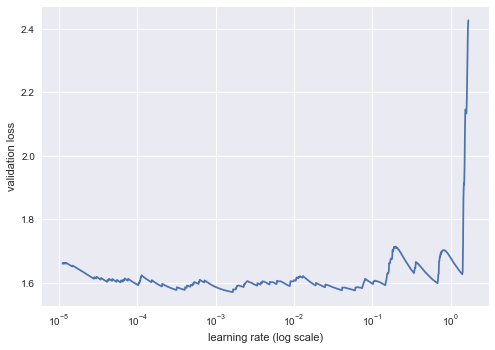

In [567]:
learner.lr_find()
learner.sched.plot()

In [568]:
learner.fit(1e-4, n_cycle=5, wds=1e-6)

epoch      trn_loss   val_loss                                  
    0      1.587977   1.593989  
    1      1.587965   1.593889                                  
    2      1.587954   1.59379                                   
    3      1.587944   1.593694                                  
    4      1.587933   1.5936                                    



[array([1.5936])]

In [569]:
log_preds = learner.predict()

In [570]:
np.exp(log_preds)[:40]

array([[0.61504, 0.38496],
       [0.61446, 0.38554],
       [0.61511, 0.38489],
       [0.6173 , 0.3827 ],
       [0.61736, 0.38264],
       [0.61689, 0.38311],
       [0.61911, 0.38089],
       [0.61752, 0.38248],
       [0.61516, 0.38484],
       [0.61796, 0.38204],
       [0.61753, 0.38247],
       [0.61559, 0.38441],
       [0.61656, 0.38344],
       [0.61769, 0.38231],
       [0.61477, 0.38523],
       [0.61603, 0.38397],
       [0.61487, 0.38513],
       [0.61881, 0.38119],
       [0.61636, 0.38364],
       [0.61741, 0.38259],
       [0.61794, 0.38206],
       [0.61695, 0.38305],
       [0.61589, 0.38411],
       [0.61718, 0.38282],
       [0.61696, 0.38304],
       [0.61807, 0.38193],
       [0.61885, 0.38115],
       [0.61737, 0.38263],
       [0.61755, 0.38245],
       [0.61581, 0.38419],
       [0.61801, 0.38199],
       [0.61651, 0.38349],
       [0.61946, 0.38054],
       [0.61892, 0.38108],
       [0.61901, 0.38099],
       [0.61759, 0.38241],
       [0.61554, 0.38446],
 

### Clipping to [0,1]

In [571]:
train_dataset = SignalDataset(x_train, one_hot_y(y_train))
valid_dataset = SignalDataset(x_valid, one_hot_y(y_valid))

In [572]:
train_dataset.x

array([[-0.07301,  0.61736, -0.03433, ..., -0.03144, -0.02933, -0.62915],
       [ 0.00391,  0.28586,  0.14544, ..., -0.0308 , -0.02898,  0.16875],
       [ 0.34918, -0.1458 , -0.00637, ..., -0.03247, -0.02967, -0.59601],
       ...,
       [-0.27318,  0.22363,  0.17287, ..., -0.0307 , -0.02908, -0.48313],
       [-0.05875,  0.18604,  0.06884, ..., -0.0335 , -0.02997, -0.82873],
       [ 0.02466,  1.08547,  0.17943, ..., -0.03109, -0.02933, -0.52329]])

In [573]:
train_dataset.x = np.clip(train_dataset.x, 0.0, 1.0)
valid_dataset.x = np.clip(valid_dataset.x, 0.0, 1.0)

In [574]:
train_dataloader = DataLoader(train_dataset)
valid_dataloader = DataLoader(valid_dataset)

In [575]:
mdata = ModelData(PATH, train_dataloader, valid_dataloader)

In [576]:
network = SimpleNet(len(train_dataset.x[0]))
network

SimpleNet(
  (fc0): Linear(in_features=590, out_features=80, bias=True)
  (fc1): Linear(in_features=80, out_features=2, bias=True)
)

In [577]:
learner = Learner.from_model_data(network, mdata)

 82%|████████▏ | 1032/1254 [00:01<00:00, 1019.28it/s, loss=1.7]


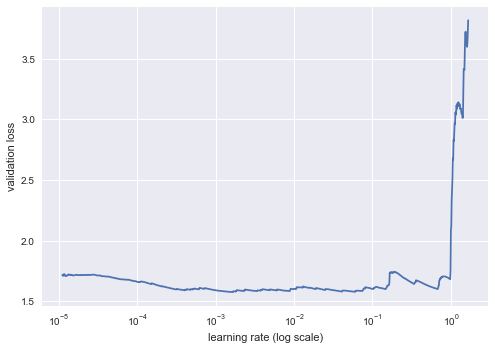

In [578]:
learner.lr_find()
learner.sched.plot()

In [579]:
learner.fit(1e-4, n_cycle=5, wds=1e-6)

epoch      trn_loss   val_loss                                  
    0      1.592702   1.598058  
    1      1.589796   1.595568                                  
    2      1.588088   1.594202                                  
    3      1.586967   1.59338                                   
    4      1.586123   1.592871                                  



[array([1.59287])]

In [580]:
log_preds = learner.predict()

In [581]:
np.exp(log_preds)[:40]

array([[0.60003, 0.39997],
       [0.56597, 0.43403],
       [0.59632, 0.40368],
       [0.59666, 0.40334],
       [0.59496, 0.40504],
       [0.56945, 0.43055],
       [0.58142, 0.41858],
       [0.59304, 0.40696],
       [0.58224, 0.41776],
       [0.55389, 0.44611],
       [0.58977, 0.41023],
       [0.58686, 0.41314],
       [0.57487, 0.42513],
       [0.57851, 0.42149],
       [0.58578, 0.41422],
       [0.57528, 0.42472],
       [0.57515, 0.42485],
       [0.6024 , 0.3976 ],
       [0.56676, 0.43324],
       [0.57762, 0.42238],
       [0.57493, 0.42507],
       [0.59623, 0.40377],
       [0.55971, 0.44029],
       [0.56766, 0.43234],
       [0.57526, 0.42474],
       [0.6145 , 0.3855 ],
       [0.58286, 0.41714],
       [0.58328, 0.41672],
       [0.59114, 0.40886],
       [0.59063, 0.40937],
       [0.58937, 0.41063],
       [0.5592 , 0.4408 ],
       [0.59507, 0.40493],
       [0.58609, 0.41391],
       [0.59081, 0.40919],
       [0.60179, 0.39821],
       [0.56093, 0.43907],
 

### No clipping; only sklearn scaling

In [582]:
train_dataset = SignalDataset(x_train, one_hot_y(y_train))
valid_dataset = SignalDataset(x_valid, one_hot_y(y_valid))

In [583]:
train_dataset.x

array([[-0.07301,  0.61736, -0.03433, ..., -0.03144, -0.02933, -0.62915],
       [ 0.00391,  0.28586,  0.14544, ..., -0.0308 , -0.02898,  0.16875],
       [ 0.34918, -0.1458 , -0.00637, ..., -0.03247, -0.02967, -0.59601],
       ...,
       [-0.27318,  0.22363,  0.17287, ..., -0.0307 , -0.02908, -0.48313],
       [-0.05875,  0.18604,  0.06884, ..., -0.0335 , -0.02997, -0.82873],
       [ 0.02466,  1.08547,  0.17943, ..., -0.03109, -0.02933, -0.52329]])

In [584]:
train_dataloader = DataLoader(train_dataset)
valid_dataloader = DataLoader(valid_dataset)

In [585]:
mdata = ModelData(PATH, train_dataloader, valid_dataloader)

In [586]:
network = SimpleNet(len(train_dataset.x[0]))
network

SimpleNet(
  (fc0): Linear(in_features=590, out_features=80, bias=True)
  (fc1): Linear(in_features=80, out_features=2, bias=True)
)

In [587]:
learner = Learner.from_model_data(network, mdata)

 38%|███▊      | 481/1254 [00:00<00:00, 1195.81it/s, loss=1.62]


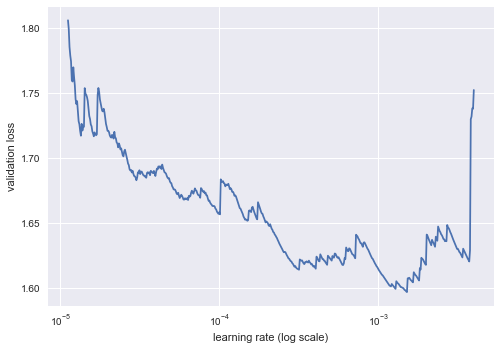

In [588]:
learner.lr_find()
learner.sched.plot()

In [589]:
learner.fit(5e-4, n_cycle=5, wds=1e-6)

epoch      trn_loss   val_loss                                 
    0      nan        nan       
    1      nan        nan                                     
    2      nan        nan                                      
    3      nan        nan                                      
    4      nan        nan                                      



[array([nan])]

In [590]:
log_preds = learner.predict()

In [591]:
np.exp(log_preds)[:40]

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

---

More work is needed.